In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path

dd = Path().cwd().parent.parent / 'data'
#dd = Path('/workspaces/marketing-data/data')

We will be using [Census Reporter](https://censusreporter.org) to get census data. This urldata comes from the "download" menu on the page for [San Diego COunty, Sex by Age, aggregated to census tracts.](https://censusreporter.org/data/table/?table=B01001&geo_ids=05000US06073,140|05000US06073&primary_geo_id=05000US06073)  

In [2]:
gdf = gpd.read_file(dd / 'acs2022_5yr_B01001_14000US06073011802.geojson')
gdf.head()

,geoid,name,B01001001,"B01001001, Error",B01001002,"B01001002, Error",B01001003,"B01001003, Error",B01001004,"B01001004, Error",...,"B01001045, Error",B01001046,"B01001046, Error",B01001047,"B01001047, Error",B01001048,"B01001048, Error",B01001049,"B01001049, Error",geometry
0,05000US06073,"San Diego County, CA",3289701.0,NaN,1667851.0,NaN,97861.0,NaN,96806.0,2019.0,...,1533.0,66546.0,1568.0,47881.0,1225.0,32278.0,1224.0,36766.0,1343.0,"MULTIPOLYGON (((-116.75730 32.56551, -116.7627..."
1,14000US06073000100,"Census Tract 1, San Diego, CA",3027.0,373.0,1466.0,222.0,237.0,119.0,65.0,53.0,...,28.0,147.0,80.0,105.0,55.0,74.0,51.0,45.0,32.0,"MULTIPOLYGON (((-117.19490 32.75278, -117.1947..."
2,14000US06073000201,"Census Tract 2.01, San Diego, CA",2294.0,331.0,1101.0,186.0,16.0,21.0,30.0,36.0,...,39.0,109.0,50.0,85.0,54.0,10.0,16.0,126.0,58.0,"MULTIPOLYGON (((-117.17887 32.75765, -117.1779..."
3,14000US06073000202,"Census Tract 2.02, San Diego, CA",3919.0,369.0,2078.0,258.0,53.0,55.0,58.0,59.0,...,13.0,163.0,133.0,65.0,54.0,40.0,39.0,60.0,45.0,"MULTIPOLYGON (((-117.18404 32.74571, -117.1838..."
4,14000US06073000301,"Census Tract 3.01, San Diego, CA",2340.0,363.0,1304.0,328.0,0.0,13.0,13.0,22.0,...,36.0,64.0,46.0,57.0,48.0,0.0,13.0,0.0,13.0,"MULTIPOLYGON (((-117.16864 32.74897, -117.1684..."


To calculate population density, we will also need the land are for the tracts, which is not in the Census Reporter files, so we get the census geography files, which were downloaded from the [Census TigerLine server. ](https://www.census.gov/cgi-bin/geo/shapefiles/index.php)

In [3]:
ca_tract = gpd.read_file('../../data/tl_2022_06_tract.zip')
ca_tract = ca_tract.rename(columns={'GEOID':'geoid', 'ALAND': 'area'})

# Fix the geoid format to match the Census reporter file
ca_tract.geoid = '14000US'+ca_tract.geoid

# For area calculations, should have the same coordinate system
ca_tract.to_crs(gdf.crs)


ca_tract.head()


,STATEFP,COUNTYFP,TRACTCE,geoid,NAME,NAMELSAD,MTFCC,FUNCSTAT,area,AWATER,INTPTLAT,INTPTLON,geometry
0,06,037,137504,14000US06037137504,1375.04,Census Tract 1375.04,G5020,S,3837562,0,+34.1480383,-118.5720594,"POLYGON ((-118.58119 34.14318, -118.58099 34.1..."
1,06,037,138000,14000US06037138000,1380,Census Tract 1380,G5020,S,4472196,0,+34.1488008,-118.5910495,"POLYGON ((-118.60573 34.14585, -118.60561 34.1..."
2,06,037,139200,14000US06037139200,1392,Census Tract 1392,G5020,S,1152028,0,+34.1756961,-118.5246446,"POLYGON ((-118.53082 34.18024, -118.52952 34.1..."
3,06,087,120901,14000US06087120901,1209.01,Census Tract 1209.01,G5020,S,18372491,0,+37.0781624,-122.0154263,"POLYGON ((-122.04607 37.07105, -122.04505 37.0..."
4,06,087,120902,14000US06087120902,1209.02,Census Tract 1209.02,G5020,S,6474889,0,+37.0628452,-122.0106243,"POLYGON ((-122.02513 37.04320, -122.02500 37.0..."


In [4]:
# Add in the area
t = gdf.merge(ca_tract[['geoid','area']], on='geoid')

t.head()
#gdf.plot(column='B01001001')


,geoid,name,B01001001,"B01001001, Error",B01001002,"B01001002, Error",B01001003,"B01001003, Error",B01001004,"B01001004, Error",...,B01001046,"B01001046, Error",B01001047,"B01001047, Error",B01001048,"B01001048, Error",B01001049,"B01001049, Error",geometry,area
0,14000US06073000100,"Census Tract 1, San Diego, CA",3027.0,373.0,1466.0,222.0,237.0,119.0,65.0,53.0,...,147.0,80.0,105.0,55.0,74.0,51.0,45.0,32.0,"MULTIPOLYGON (((-117.19490 32.75278, -117.1947...",1536251
1,14000US06073000201,"Census Tract 2.01, San Diego, CA",2294.0,331.0,1101.0,186.0,16.0,21.0,30.0,36.0,...,109.0,50.0,85.0,54.0,10.0,16.0,126.0,58.0,"MULTIPOLYGON (((-117.17887 32.75765, -117.1779...",864211
2,14000US06073000202,"Census Tract 2.02, San Diego, CA",3919.0,369.0,2078.0,258.0,53.0,55.0,58.0,59.0,...,163.0,133.0,65.0,54.0,40.0,39.0,60.0,45.0,"MULTIPOLYGON (((-117.18404 32.74571, -117.1838...",1305997
3,14000US06073000301,"Census Tract 3.01, San Diego, CA",2340.0,363.0,1304.0,328.0,0.0,13.0,13.0,22.0,...,64.0,46.0,57.0,48.0,0.0,13.0,0.0,13.0,"MULTIPOLYGON (((-117.16864 32.74897, -117.1684...",401792
4,14000US06073000302,"Census Tract 3.02, San Diego, CA",2934.0,392.0,1437.0,340.0,17.0,28.0,0.0,13.0,...,154.0,99.0,36.0,52.0,42.0,40.0,51.0,43.0,"MULTIPOLYGON (((-117.16401 32.74091, -117.1640...",496970


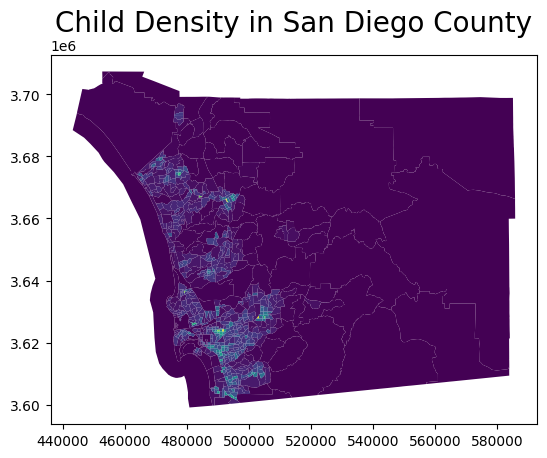

In [5]:
t  = t.to_crs(epsg='32611')  # UTM Zone 11N, which covers california
# Calculate the number of children from 0 to 18. 
t['boys'] =  t.B01001003 + t.B01001004 + t.B01001005 + t.B01001006 + t.B01001007 
t['girls'] = t.B01001027 + t.B01001028 + t.B01001029 + t.B01001030 + t.B01001031
t['child'] = t.boys + t.girls

t['child_density'] = t.child / t.area

fig, ax = plt.subplots(1, 1)
t.plot(ax=ax, column='child_density')
ax.set_title('Child Density in San Diego County', fontdict={'fontsize': 20, 'fontweight': 'medium'})


t.to_file(dd / "child_density.geojson", driver='GeoJSON')

Text(0.5, 1.0, 'Child Density in San Diego County')

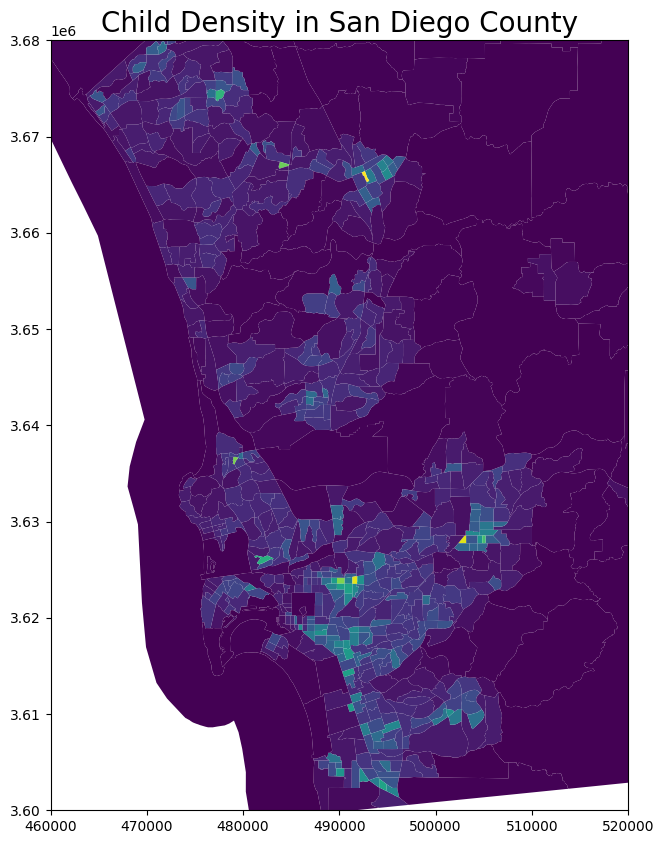

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))


# Set the x and y limits to the specified bounds
ax.set_xlim(460000, 520000)
ax.set_ylim(3600000, 3680000)

t.plot(ax=ax, column='child_density')
ax.set_title('Child Density in San Diego County', fontdict={'fontsize': 20, 'fontweight': 'medium'})


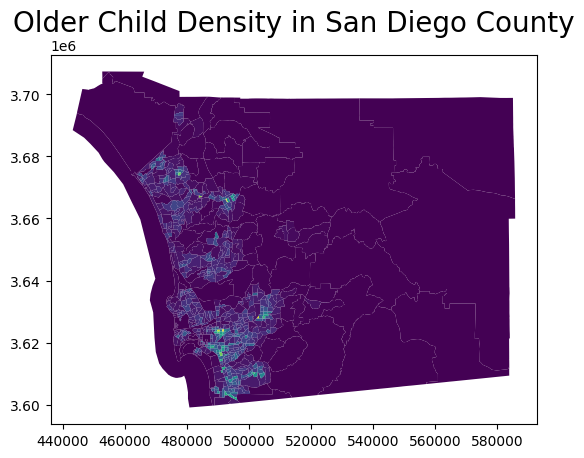

In [7]:
# Older Kids

t  = t.to_crs(epsg='32611')  # UTM Zone 11N, which covers california
# Calculate the number of children from 10 to 17. 
t['boys'] =  t.B01001005 + t.B01001006 
t['girls'] = t.B01001029 + t.B01001030 
t['child'] = t.boys + t.girls

t['child_density'] = t.child / t.area

fig, ax = plt.subplots(1, 1)
t.plot(ax=ax, column='child_density')
ax.set_title('Older Child Density in San Diego County', fontdict={'fontsize': 20, 'fontweight': 'medium'})


t.to_file(dd / "older_child_density.geojson", driver='GeoJSON')